# 연습문제


## numpy

python에서 array등을 다루는 수학/과학 컴퓨팅을 하기 위한 패키지

## matplotlib

python에서 matlab과 유사한 그래프 표시를 가능하게 하는 패키지

In [1]:
# Cell 클릭 후 Shift+Enter로 실행 (Comment는 #으로 시작)

# Install necessary packages
!pip install numpy
!pip install matplotlib

## numpy
(본 cell은 markdown 형식으로, 더블클릭/Enter로 들어가고 Shift+Enter로 나갈 수 있다. 주석 용으로 사용.)  

python에서 과학 컴퓨팅을 하기 위해 사용하는 패키지로 python 라이브러리로 Import 하여 사용.

In [2]:
# 패키지 사용을 위한 약자 지정

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Lab_1: Perceptron
---
Perceptron 알고리즘 구현하기
아래 이름, 학번을 작성하세요.

In [3]:
lab1_student_id = '20161595'
lab1_student_name = '배성현'

## Practice 1

아래의 train_perceptron 알고리즘을 구현하시오.

```np.random.seed``` 

random number(난수) 발생을 위한 조건 설정. 괄호 안의 숫자에 따라 난수 생성 방식이 다르게 고정됨

(https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.seed.html)



In [4]:
# Do not change
np.random.seed(5)

```np.random.multivariate_normal```

multivariate normal distribution 으로부터 random sample 을 추출

https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

In [5]:
num_data = 20

# feature dataset

class_zeros = np.random.multivariate_normal(mean=[0, 0], cov=[[1., .95],[.95, 1.]], size=num_data)
class_ones = np.random.multivariate_normal(mean=[1, 5], cov=[[1., .85],[.85, 1.]], size=num_data)

print(f'class_zeros: \n{class_zeros} \nclass_ones: \n{class_ones}')

class_zeros: 
[[-3.83362070e-01 -4.87992399e-01]
 [-2.36033497e+00 -2.44005350e+00]
 [-3.58443281e-01  1.41981188e-01]
 [ 9.91341033e-01  8.04249095e-01]
 [-1.33086323e-01 -2.37400363e-01]
 [ 1.21015451e+00  1.14536687e+00]
 [ 2.58897957e-01  4.49732434e-01]
 [ 1.75455499e+00  1.53313893e+00]
 [-1.43057734e+00 -8.43237710e-01]
 [ 1.39021091e+00  1.59412960e+00]
 [ 1.10375308e+00  8.32792324e-01]
 [ 9.27716082e-01  7.94107344e-01]
 [-1.09654919e+00 -8.71261800e-01]
 [-9.55767122e-04 -1.15844755e-01]
 [ 1.35016013e-02 -1.99965457e-02]
 [-6.83217166e-01 -8.82937652e-01]
 [ 2.20971746e-02 -9.86321054e-03]
 [ 1.22453888e-02  9.10549322e-02]
 [-4.06231793e-01  1.58843897e-02]
 [-1.61117147e-01  3.32682722e-01]] 
class_ones: 
[[ 1.42499215  5.16332788]
 [ 0.80577228  5.00045395]
 [ 0.38687635  5.09451383]
 [-0.23119307  4.03962309]
 [ 1.35103223  5.29592348]
 [-0.41995562  3.70123025]
 [ 2.44950645  6.07181602]
 [ 1.23989017  5.87097871]
 [ 0.48411129  5.72202275]
 [ 0.33430386  4.40266337]
 

```np.vstack, np.hstack```

배열을 각각 vertically, horizontally stacking 함


https://numpy.org/doc/stable/reference/generated/numpy.vstack.html?highlight=vstack#numpy.vstack

https://numpy.org/doc/stable/reference/generated/numpy.hstack.html?highlight=hstack#numpy.hstack

In [6]:
biases = np.ones((2 * num_data, 1))

class_data = np.vstack((class_zeros, class_ones)).astype(np.float32)

features = np.hstack((biases, class_data))

print(f'biases: \n{biases} \nclass_data: \n{class_data} \nfeatures: \n{features}')
print(f'biases.shape: \n{biases.shape} \nclass_data.shape: \n{class_data.shape} \
\nfeatures.shape: \n{features.shape}')

biases: 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 
class_data: 
[[-3.8336208e-01 -4.8799241e-01]
 [-2.3603349e+00 -2.4400535e+00]
 [-3.5844329e-01  1.4198118e-01]
 [ 9.9134105e-01  8.0424911e-01]
 [-1.3308632e-01 -2.3740037e-01]
 [ 1.2101545e+00  1.1453669e+00]
 [ 2.5889796e-01  4.4973242e-01]
 [ 1.7545550e+00  1.5331390e+00]
 [-1.4305774e+00 -8.4323770e-01]
 [ 1.3902109e+00  1.5941296e+00]
 [ 1.1037531e+00  8.3279234e-01]
 [ 9.2771608e-01  7.9410732e-01]
 [-1.0965492e+00 -8.7126178e-01]
 [-9.5576711e-04 -1.1584476e-01]
 [ 1.3501601e-02 -1.9996546e-02]
 [-6.8321717e-01 -8.8293767e-01]
 [ 2.2097174e-02 -9.8632108e-03]
 [ 1.2245389e-02  9.1054931e-02]
 [-4.0623179e-01  1.5884390e-02]
 [-1.6111715e-01  3.3268273e-01]
 [ 1.4249922e+00  5.1633277e+00]
 [ 8.0577230e-01  5.0004539e+00]
 [ 3.86876

In [7]:
# Label dataset

label_zeros = np.zeros((num_data, 1))
label_ones = np.ones((num_data, 1))

labels = np.vstack((label_zeros, label_ones))
dataset = np.hstack((features,labels))

print(f'labels: \n{labels} \ndataset: \n{dataset}')

labels: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 
dataset: 
[[ 1.00000000e+00 -3.83362085e-01 -4.87992406e-01  0.00000000e+00]
 [ 1.00000000e+00 -2.36033487e+00 -2.44005346e+00  0.00000000e+00]
 [ 1.00000000e+00 -3.58443290e-01  1.41981184e-01  0.00000000e+00]
 [ 1.00000000e+00  9.91341054e-01  8.04249108e-01  0.00000000e+00]
 [ 1.00000000e+00 -1.33086324e-01 -2.37400368e-01  0.00000000e+00]
 [ 1.00000000e+00  1.21015453e+00  1.14536691e+00  0.00000000e+00]
 [ 1.00000000e+00  2.58897960e-01  4.49732423e-01  0.00000000e+00]
 [ 1.00000000e+00  1.75455499e+00  1.53313899e+00  0.00000000e+00]
 [ 1.00000000e+00 -1.43057740e+00 -8.43237698e-01  0.00000000e+00]
 [ 1.00000000e+00  1.39021087e+00  1.59412956e+00  0.00000000e+00]
 [ 1.00000000e+00  1.10375309e+00  8.32792342e-01  0.00000000e+00]
 [

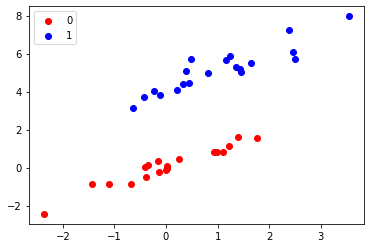

In [8]:
plt.scatter(features[:, 1][:num_data], features[:, 2][:num_data], c = 'r', label='0')
plt.scatter(features[:, 1][num_data:], features[:, 2][num_data:], c = 'b', label='1')

plt.legend()
plt.show()

In [9]:
# dataset shuffling
np.random.shuffle(dataset)

split_ratio = 0.7

# splitting dataset
train = dataset[0:int(split_ratio * (num_data * 2))]
test = dataset[int(split_ratio * (num_data * 2)):(num_data * 2)]

print(train.shape, test.shape)

(28, 4) (12, 4)


In [10]:
# reshaping data
x_train = train[:, 0:3]
y_train = train[:, 3]

x_test = test[:, 0:3]
y_test = test[:, 3]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(28, 3) (28,)
(12, 3) (12,)


In [11]:
print(x_train[0])
print(y_train[0])

[ 1.         -0.12344763  3.83624363]
1.0


In [12]:
# Todo: practice 1
def train_perceptron(w, x, y, epoch=30):
    for i in range(1, epoch+1):#epoch만큼 반복시키면서 학습
        error=np.array([0.0, 0.0, 0.0])#sigma(-yx)값이 저장되는 델타 에러 변수.
        for k in range(0, len(x)): #sigma(-yx)값을 구하기위해 모든 train set 순회
            y_lecture=1#강의자료에서는 1과 -1로 구분하므로 강의자료와 같이 계산하기 위해 넣어준 변수(class1 => 1, class0 => -1)
            if y[k]==0:#class0인경우
                y_lecture=-1#class1이면 1이고 class0이면 -1값을 가짐.
            if y_lecture*np.dot(x[k],w)<0: #y*w*x가 0보다 작으면 오류이므로
                error-=y_lecture*x[k] #오류값에 -yx값 더해줌 sigma(-yx)값
        w = w-error;#w값 갱신해줌.
    return w

In [13]:
# w 와 x1 을 이용해 x2 값을 구함

def x2(x1, w):
    w0 = w[0]
    w1 = w[1]
    w2 = w[2]
    x2 = []
    for i in range(len(x1 - 1)):
        x2_temp = (-w0 -w1 * x1[i]) / w2
        x2.append(x2_temp)
    return x2

# visualizaing decision boundary

def show_plt(w, class_data, labels):
#   w and class_data are 2-element with no bias, and 3-element with bias
    len_w = len(w)
    sh_data = class_data.shape
    if len_w != sh_data[1]:
        print('error: w and data dimension does not match')
        return
    
    if len_w == 3:
        class_data = class_data[:,1:]
        
    min = np.min(class_data[:, 0])
    max = np.max(class_data[:, 0])
    
    x1 = np.linspace(min, max, 100)
    x1 = x1.reshape(len(x1),1)
    x_2 = np.asarray(x2(x1, w))
    
    data_zeros = class_data[labels == 0]
    data_ones = class_data[labels == 1]
    
    plt.scatter(data_zeros[:, 0], data_zeros[:, 1], c = 'r', label='0')
    plt.scatter(data_ones[:, 0], data_ones[:, 1], c = 'b', label='1')
    plt.plot(x1, x_2)

    plt.legend()
    plt.show()
    

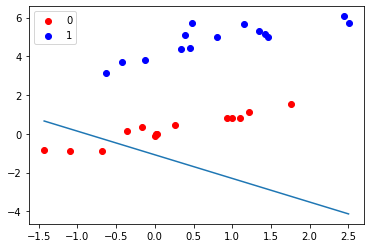

In [14]:
w = np.random.rand(len(x_train[0]))


show_plt(w, x_train, y_train)

In [15]:
w = train_perceptron(w, x_train, y_train)

print("The weights are:", w)

# Do not change
lab1_student_answer_w = w

The weights are: [-29.17999874 -18.31183293  38.29983915]


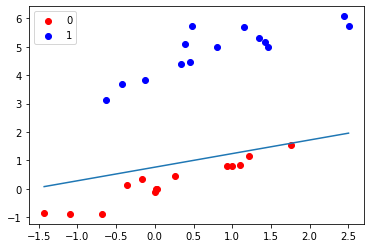

In [16]:
show_plt(w, x_train, y_train)

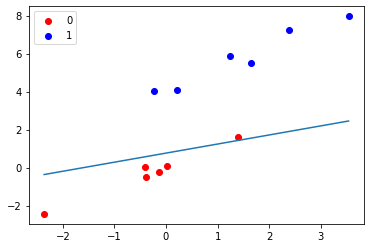

In [17]:
show_plt(w, x_test, y_test)

## Practice 2

hyperplane이 구해지는 최소 epoch를 출력할 수 있도록 train_perceptron 코드를 수정하시오.

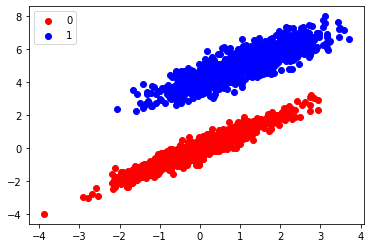

In [18]:
num_data = 1000

class_zeros = np.random.multivariate_normal(mean=[0,0], cov=[[1.,.95],[.95,1.]], size=num_data)
class_ones = np.random.multivariate_normal(mean=[1,5], cov=[[1.,.85],[.85,1.]], size=num_data)

biases = np.ones((2 * num_data, 1))

class_data = np.vstack((class_zeros, class_ones)).astype(np.float32)

features = np.hstack((biases, class_data))

label_zeros = np.zeros((num_data, 1))
label_ones = np.ones((num_data, 1))

labels = np.vstack((label_zeros, label_ones))
dataset = np.hstack((features,labels))

plt.scatter(features[:, 1][:num_data], features[:, 2][:num_data], c = 'r', label='0')
plt.scatter(features[:, 1][num_data:], features[:, 2][num_data:], c = 'b', label='1')

plt.legend()
plt.show()

In [19]:
np.random.shuffle(dataset)

split_ratio = 0.7

train = dataset[0:int(split_ratio * (num_data * 2))]
test = dataset[int(split_ratio * (num_data * 2)):(num_data * 2)]

x_train = train[:, 0:3]
y_train = train[:, 3]

x_test = test[:, 0:3]
y_test = test[:, 3]


# Todo: practice 2
def train_perceptron(w, x, y, epoch=30):
    min_epoch = epoch
    for i in range(1, epoch+1):#epoch만큼 반복시키면서 학습
        error=np.array([0.0, 0.0, 0.0])#sigma(-yx)값이 저장되는 델타 에러 변수.
        for k in range(0, len(x)): #sigma(-yx)값을 구하기위해 모든 train set 순회
            y_lecture=1#강의자료에서는 1과 -1로 구분하므로 강의자료와 같이 계산하기 위해 넣어준 변수
            if y[k]==0:
                y_lecture=-1#class1이면 1이고 class0이면 -1값을 가짐.
            if y_lecture*np.dot(x[k],w)<0: #y*w*x가 0보다 작으면 오류이므로
                error-=y_lecture*x[k] #오류값에 -yx값 더해줌 sigma(-yx)값
        if np.array_equal(error, np.array([0.0, 0.0, 0.0])) and i<min_epoch:
            #error값이 [0, 0, 0]이면 error가 없다는 것이고  
            #i는 점점 증가하기 때문에 error가 0일 때의
            #최초의 i(최소 epoch)가 min_epoch에 저장이 된다.
            min_epoch=i
        w = w-error;#w값 갱신해줌.
    return w, min_epoch

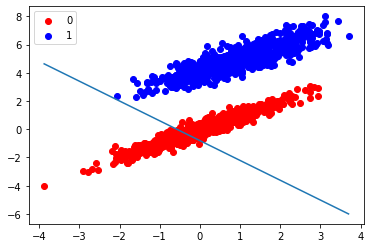

In [20]:
w = np.random.rand(len(x_train[0]))

show_plt(w, x_train, y_train)

The weights are: [-1571.62826666 -1105.33492813  1474.79667778]


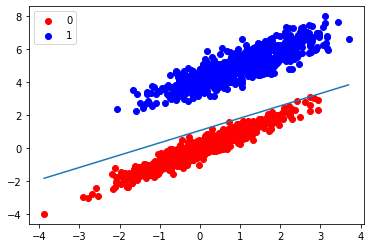

In [21]:
w, min_epoch = train_perceptron(w, x_train, y_train)

print("The weights are:", w)

# Do not change -->
lab1_student_answer_w2 = w
lab1_stduent_answer_min_epoch = min_epoch
# <--
show_plt(w, x_train, y_train)

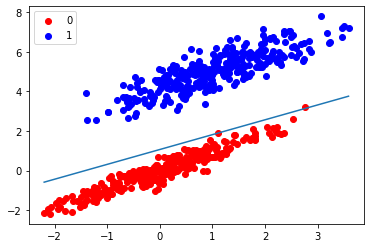

In [22]:
show_plt(w, x_test, y_test)

## Practice 3

hyperplane이 구해지는 최소 epoch를 줄일 수 있도록 train_perceptron 코드를 수정하시오.

In [23]:
# Todo: practice 3
def train_perceptron(w, x, y, epoch=30):
    min_epoch = epoch
    for i in range(1, epoch+1):#epoch만큼 반복시키면서 학습
        error=np.array([0.0, 0.0, 0.0])#sigma(-yx)값이 저장되는 델타 에러 변수.
        for k in range(0, len(x)): #sigma(-yx)값을 구하기위해 모든 train set 순회
            y_lecture=1#강의자료에서는 1과 -1로 구분하므로 강의자료와 같이 계산하기 위해 넣어준 변수
            if y[k]==0:
                y_lecture=-1#class1이면 1이고 class0이면 -1값을 가짐.
            if y_lecture*np.dot(x[k],w)<0: #y*w*x가 0보다 작으면 오류이므로
                error-=y_lecture*x[k] #오류값에 -yx값 더해줌 sigma(-yx)값
        if np.array_equal(error, np.array([0.0, 0.0, 0.0])) and i<min_epoch:
            #error값이 [0, 0, 0]이면 error가 없다는 것이고  
            #i는 점점 증가하기 때문에 error가 0일 때의
            #최초의 i(최소 epoch)가 min_epoch에 저장이 된다.
            min_epoch=i
        w = w-0.0020*error;#w값 갱신해줄 때 구한 error에 적절한 상수값(0.0020)을 곱하여 최소 epoch를 줄일수 있도록함
                            #적절한 상수값은 여러 상수값을 for문을 통해 돌려보면서 epoch값이 작게 나오는 값을 고름.
    return w, min_epoch

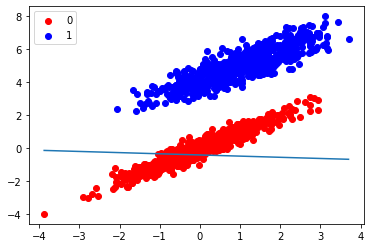

In [24]:
w = np.random.rand(len(x_train[0]))

show_plt(w, x_train, y_train)

The weights are: [-0.56746953 -0.39553388  0.34670649]


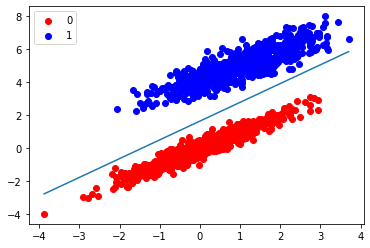

In [25]:
w, min_epoch = train_perceptron(w, x_train, y_train)

print("The weights are:", w)

# Do not change -->
lab1_student_answer_w3 = w
lab1_stduent_answer_min_epoch3 = min_epoch
# <--
show_plt(w, x_train, y_train)

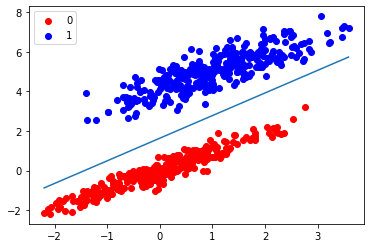

In [26]:
show_plt(w, x_test, y_test)

수고하셨습니다. 

조교메일: cvipsj@sogang.ac.kr

# 정답 확인용

수정금지 - 조교

In [27]:
print(f'학번: {lab1_student_id}')
print(f'이름: {lab1_student_name}')

학번: 20161595
이름: 배성현


In [28]:
print(f'Answer of practice 1: {abs(sum(lab1_student_answer_w - [-4.179, -2.512, 3.055])) < 0.01}')

Answer of practice 1: False


In [29]:
print(f'Answer of practice 2: {abs(sum(lab1_student_answer_w2 - [-6.628, -4.476, 5.423])) < 0.01}')
print(f'Min epochs at practice 2: {lab1_stduent_answer_min_epoch}')

Answer of practice 2: False
Min epochs at practice 2: 23


In [30]:
print(f'Answer of practice 2: {lab1_student_answer_w3}')
print(f'Min epochs at practice 2: {lab1_stduent_answer_min_epoch3}')

Answer of practice 2: [-0.56746953 -0.39553388  0.34670649]
Min epochs at practice 2: 2
